In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, Model
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import rotate

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert to float32 and scale to [-1, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# map [0, 255] to [0, 2], then subtract 1 to get [-1, 1]
x_train = (x_train / 127.5) - 1.0
x_test = (x_test / 127.5) - 1.0

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_train dtype: {x_train.dtype}")
print(f"x_train min value: {np.min(x_train)}")
print(f"x_train max value: {np.max(x_train)}")

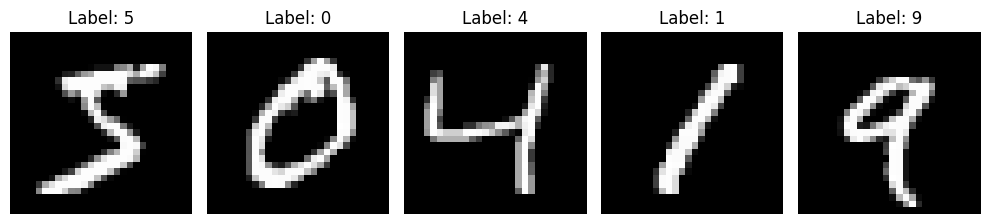

In [16]:
num_images_to_show = 5
fig, axes = plt.subplots(1, num_images_to_show, figsize=(10, 3))
for i in range(num_images_to_show):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [19]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(50, kernel_size=(5, 5), padding='valid', activation='relu', name='conv1'),
    # (28-5+1, 28-5+1, 50) = (24, 24, 50)
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='pool1'),
    # (24/2, 24/2, 50) = (12, 12, 50)
    layers.Conv2D(20, kernel_size=(5, 5), padding='valid', activation='relu', name='conv2'),
    # (12-5+1, 12-5+1, 20) = (8, 8, 20)
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='pool2'),
    # (8/2, 8/2, 20) = (4, 4, 20)
    layers.Flatten(name='flatten'),
    # 4 * 4 * 20 = 320
    layers.Dense(200, activation='relu', name='dense1'),
    # 200
    layers.Dense(2, activation=None, name='embedding'),
    # 2
    layers.Dense(10, activation='softmax', name='output')
    # 10
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 24, 24, 50)     │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 12, 12, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 8, 8, 20)       │        25,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 200)            │        64,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Dense)               │ (None, 2)              │           402 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,952 (355.28 KB)

 Trainable params: 90,952 (355.28 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
batch_size = 100
epochs = 20 # could increase if I want better accuracy
validation_split = 0.1

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1) # Set verbose=1 to see progress per epoch

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.2141 - loss: 2.0850 - val_accuracy: 0.4660 - val_loss: 1.3204
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5235 - loss: 1.2473 - val_accuracy: 0.6588 - val_loss: 0.8882
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6814 - loss: 0.8782 - val_accuracy: 0.8093 - val_loss: 0.6099
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8035 - loss: 0.6430 - val_accuracy: 0.8790 - val_loss: 0.4667
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8602 - loss: 0.5165 - val_accuracy: 0.8970 - val_loss: 0.3967
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8905 - loss: 0.4274 - val_accuracy: 0.9138 - val_loss: 0.3397
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9069 - loss: 0.3719 - val_accuracy: 0.9267 - val_loss: 0.3013
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9184 - loss: 0.3313 - val_accu

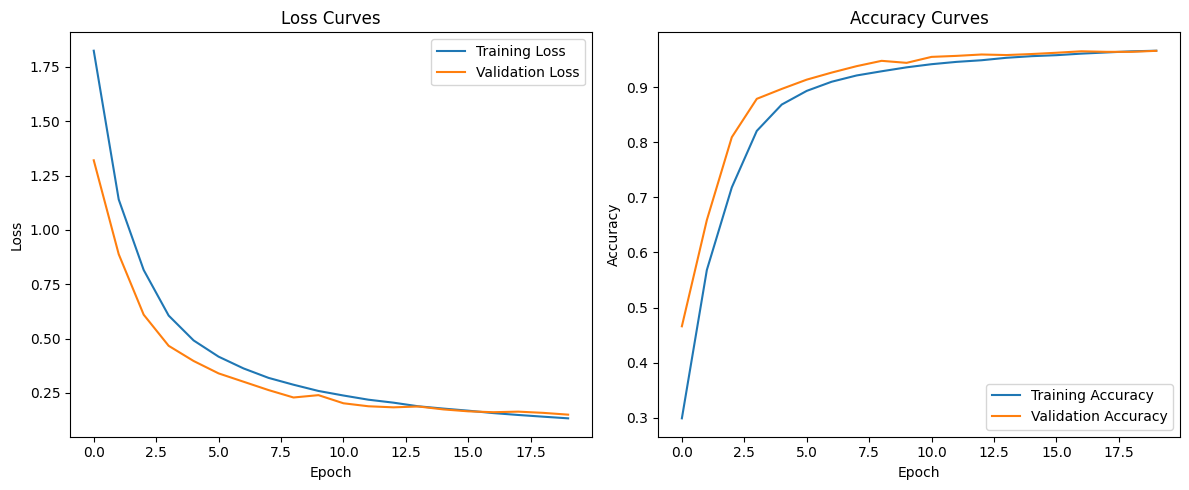

In [22]:
# plotting loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# evaluate on training set
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Training Accuracy: 96.71%
Training Loss: 0.1277
Test Accuracy: 96.08%
Test Loss: 0.1629


Overall, there is not much overfitting, though we can see the training loss dip below the validation loss after around epoch 16, and the training and validation accuracies roughly converge around epoch 13. In terms of accuracy, it does quite well, with 96.71% training accuracy and 96.08% test accuracy. With both of those values being so close to one another we can be confident that the model is barely if at all overfit on the data while being quite accurate.

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/Users/bshowell/Desktop/school/spring 24-25/587/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


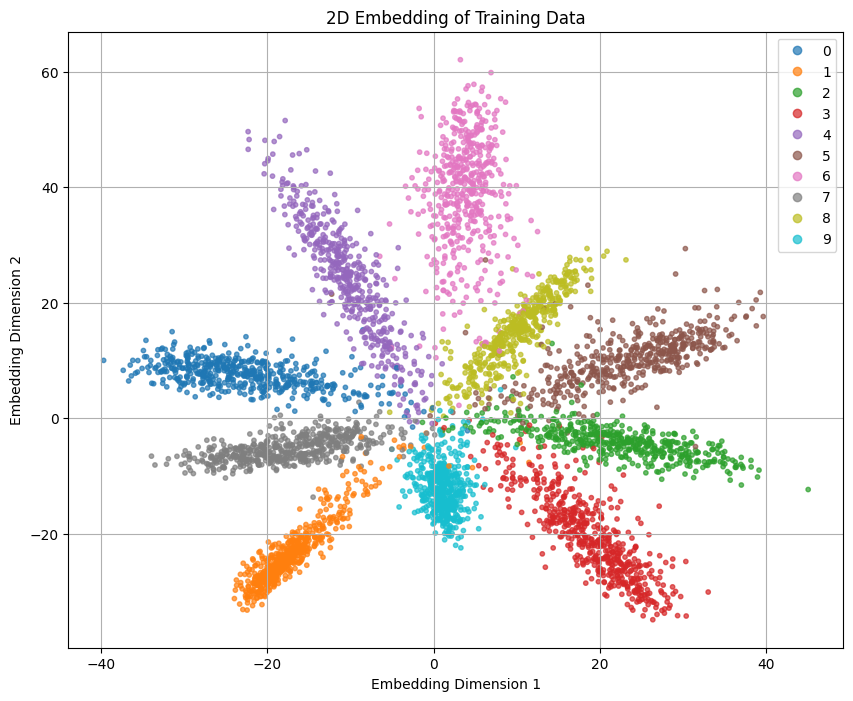

In [65]:
embedding_model = Model(inputs=model.inputs, outputs=model.get_layer('embedding').output)

# subset
num_samples_to_plot = 5000
indices = np.random.choice(x_train.shape[0], num_samples_to_plot, replace=False)
x_train_subset = x_train[indices]
y_train_subset = y_train[indices]

# # full dataset
# x_train_subset = x_train[:]
# y_train_subset = y_train[:]

train_embeddings = embedding_model.predict(x_train_subset)

# Create scatter plot, colored by class label
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_embeddings[:, 0], train_embeddings[:, 1], c=y_train_subset, cmap='tab10', alpha=0.7, s=10)
plt.title('2D Embedding of Training Data')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
unique_labels = np.unique(y_train_subset)
string_labels = [str(label) for label in unique_labels]
plt.legend(handles=scatter.legend_elements()[0], labels=string_labels)
plt.grid(True)
plt.show()

- The shape observed in this 2D embedding of the training data reveals the kinds of transformations the model does to classify the data. Each number ends up in its own distinct clustering. It is likely that the few overlapping areas of the clusters in the middle of the graph are the less confident guesses and misclassifications of the model, since it can't be sure which category it definitely falls into.
- The embedding layer was purposefully chosen to be of size 2 to be able to be plottable like this. It has the linear activation via the `activation=None` coming from the dense 200 dimensional layer before, so the model learns to convert from 200d space to 2d in a way that the final output layer can classify.
```python
layers.Dense(200, activation='relu', name='dense1'),
layers.Dense(2, activation=None, name='embedding'),
layers.Dense(10, activation='softmax', name='output')
```

In [67]:
# get index for one of each digit
digit_indices = [np.where(y_test == i)[0][0] for i in range(10)]
example_images = x_test[digit_indices]
example_labels = y_test[digit_indices]

rotation_angles = np.arange(0, 361, 10) # 0 to 360 in 10 degree increments

original_model_predictions = {}

print("Running rotation analysis on original model...")
for i in range(10):
    digit = example_labels[i]
    original_image = example_images[i] # Shape (28, 28, 1)
    original_model_predictions[digit] = {}
    print(f"  Processing Digit: {digit}")

    for angle in rotation_angles:
        rotated_img = rotate(original_image, angle, reshape=False, mode='constant', cval=-1.0, order=1)
        rotated_img = rotated_img.astype('float32')
        rotated_img = np.expand_dims(rotated_img, axis=0)

        probabilities = model.predict(rotated_img, verbose=0)[0]
        original_model_predictions[digit][angle] = probabilities

print("Rotation analysis complete.")

Running rotation analysis on original model...
  Processing Digit: 0
  Processing Digit: 1
  Processing Digit: 2
  Processing Digit: 3
  Processing Digit: 4
  Processing Digit: 5
  Processing Digit: 6
  Processing Digit: 7
  Processing Digit: 8
  Processing Digit: 9
Rotation analysis complete.


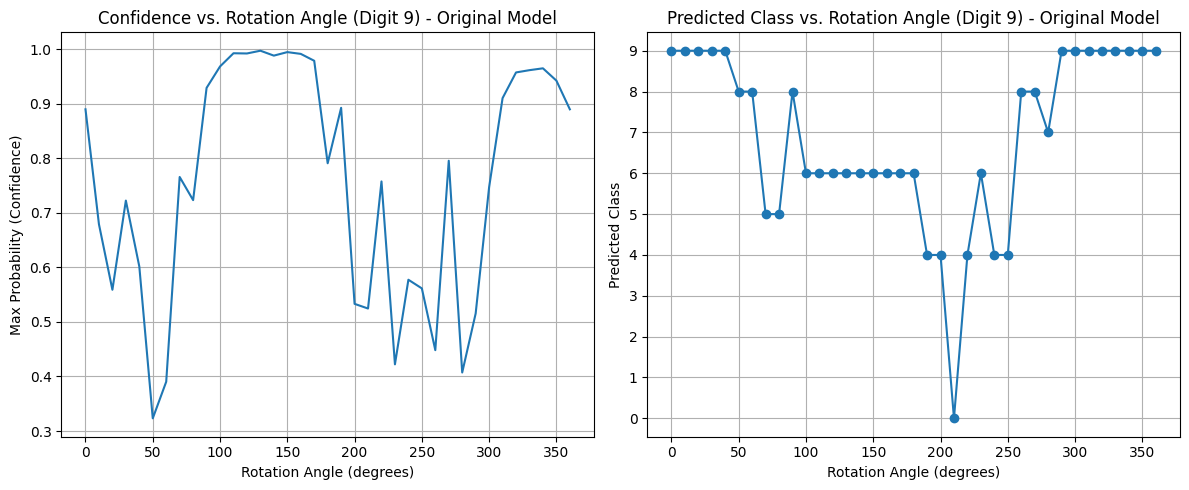

In [69]:
# example plot confidence for 9
digit_to_plot = 9
angles = list(original_model_predictions[digit_to_plot].keys())
confidences = [np.max(original_model_predictions[digit_to_plot][angle]) for angle in angles]
predicted_classes = [np.argmax(original_model_predictions[digit_to_plot][angle]) for angle in angles]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(angles, confidences)
plt.title(f'Confidence vs. Rotation Angle (Digit {digit_to_plot}) - Original Model')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Max Probability (Confidence)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(angles, predicted_classes, marker='o', linestyle='-')
plt.title(f'Predicted Class vs. Rotation Angle (Digit {digit_to_plot}) - Original Model')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Predicted Class')
plt.yticks(range(10))
plt.grid(True)

plt.tight_layout()
plt.show()


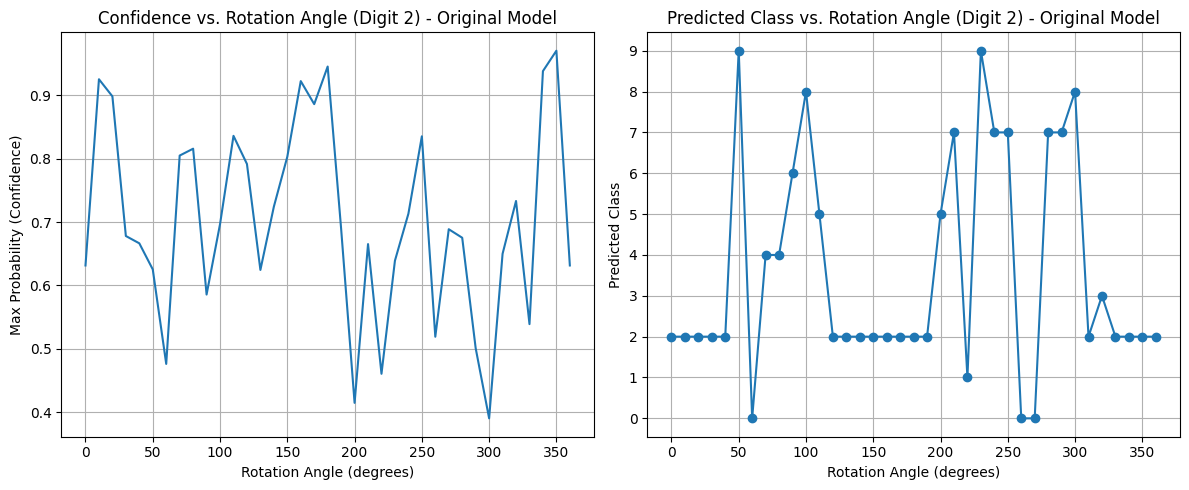

In [70]:
# example plot confidence for 2
digit_to_plot = 2
angles = list(original_model_predictions[digit_to_plot].keys())
confidences = [np.max(original_model_predictions[digit_to_plot][angle]) for angle in angles]
predicted_classes = [np.argmax(original_model_predictions[digit_to_plot][angle]) for angle in angles]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(angles, confidences)
plt.title(f'Confidence vs. Rotation Angle (Digit {digit_to_plot}) - Original Model')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Max Probability (Confidence)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(angles, predicted_classes, marker='o', linestyle='-')
plt.title(f'Predicted Class vs. Rotation Angle (Digit {digit_to_plot}) - Original Model')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Predicted Class')
plt.yticks(range(10))
plt.grid(True)

plt.tight_layout()
plt.show()


We would assume that an upside down 6 will be classified as a 9.  But what happens in between?  What does an upside down 2 get classified as?  Does the network’s confidence in its predictions change as you rotate the digits?
- I analyzed 9 being rotated instead of 6 to make the graph start at the top just to make it easier for myself, doesn't change the analysis.
- As it gets rotated, it does indeed get classified as a 6 near angles of 180 degrees.
- At intermediate angles, the model is much more unsure in its confidence, and guesses a bunch of different numbers.
- Upside down, 2 is still guessed as a 2, since generally (unless you draw it unusually) a two is vertically symmetric.
- The model is most confident at the edges of the graph (near zero and 360 degree rotations) as expected, and it also has a higher confidence around 180, since a lot of digits are vertically symmetric as mentioned

In [57]:
rotation_factor = 0.2

augmented_model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.RandomRotation(factor=rotation_factor, fill_mode='constant', fill_value=-1.0),
    # rest is the same as original model
    layers.Conv2D(50, kernel_size=(5, 5), padding='valid', activation='relu', name='conv1'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='pool1'),
    layers.Conv2D(20, kernel_size=(5, 5), padding='valid', activation='relu', name='conv2'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='pool2'),
    layers.Flatten(name='flatten'),
    layers.Dense(200, activation='relu', name='dense1'),
    layers.Dense(2, activation=None, name='embedding'),
    layers.Dense(10, activation='softmax', name='output')
])

augmented_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_rotation_1               │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 24, 24, 50)     │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 12, 12, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 8, 8, 20)       │        25,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 200)            │        64,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Dense)               │ (None, 2)              │           402 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,952 (355.28 KB)

 Trainable params: 90,952 (355.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
learning_rate = 0.01
optimizer_aug = tf.keras.optimizers.SGD(learning_rate=learning_rate)

augmented_model.compile(optimizer=optimizer_aug,
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

batch_size = 100
epochs = 30 # added epochs for added complexity
validation_split = 0.1

print("Training augmented model...")
history_aug = augmented_model.fit(x_train, y_train, # use original training data
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  validation_split=validation_split,
                                  verbose=1)
print("Augmented model training complete.")


Training augmented model...
Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1457 - loss: 2.2560 - val_accuracy: 0.3147 - val_loss: 1.9011
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.3365 - loss: 1.8012 - val_accuracy: 0.4438 - val_loss: 1.3938
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.4623 - loss: 1.4020 - val_accuracy: 0.5907 - val_loss: 1.1023
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5970 - loss: 1.1642 - val_accuracy: 0.6705 - val_loss: 0.9035
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6543 - loss: 0.9904 - val_accuracy: 0.7150 - val_loss: 0.8200
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7105 - loss: 0.8540 - val_accuracy: 0.7552 - val_loss: 0.7110
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7525 - loss: 0.7669 - val_accuracy: 0.8122 - val_loss: 0.5879
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.78

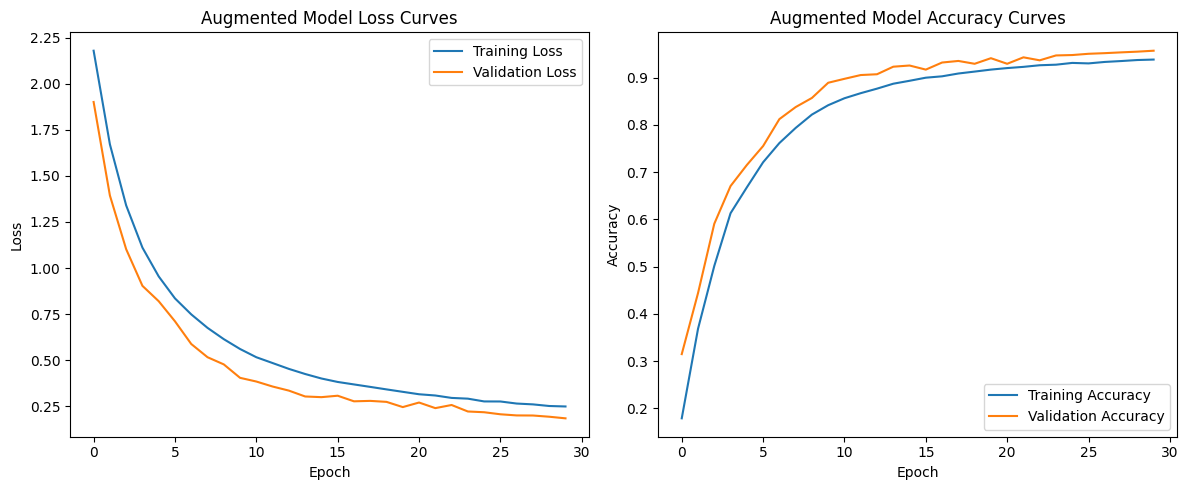

In [59]:
# loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['loss'], label='Training Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.title('Augmented Model Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Augmented Model Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
test_loss_aug, test_acc_aug = augmented_model.evaluate(x_test, y_test, verbose=0)
print(f"Augmented Model Test Accuracy: {test_acc_aug*100:.2f}%")
print(f"Augmented Model Test Loss: {test_loss_aug:.4f}")

Augmented Model Test Accuracy: 95.38%
Augmented Model Test Loss: 0.1967


In [71]:
augmented_model_predictions = {}

print("Running rotation analysis on augmented model...")
for i in range(10):
    digit = example_labels[i]
    original_image = example_images[i]
    augmented_model_predictions[digit] = {}
    print(f"  Processing Digit: {digit}")

    for angle in rotation_angles:
        rotated_img = rotate(original_image, angle, reshape=False, mode='constant', cval=-1.0, order=1)
        rotated_img = rotated_img.astype('float32')
        rotated_img = np.expand_dims(rotated_img, axis=0)

        probabilities = augmented_model.predict(rotated_img, verbose=0)[0]
        augmented_model_predictions[digit][angle] = probabilities

print("Rotation analysis complete for augmented model.")

Running rotation analysis on augmented model...
  Processing Digit: 0
  Processing Digit: 1
  Processing Digit: 2
  Processing Digit: 3
  Processing Digit: 4
  Processing Digit: 5
  Processing Digit: 6
  Processing Digit: 7
  Processing Digit: 8
  Processing Digit: 9
Rotation analysis complete for augmented model.


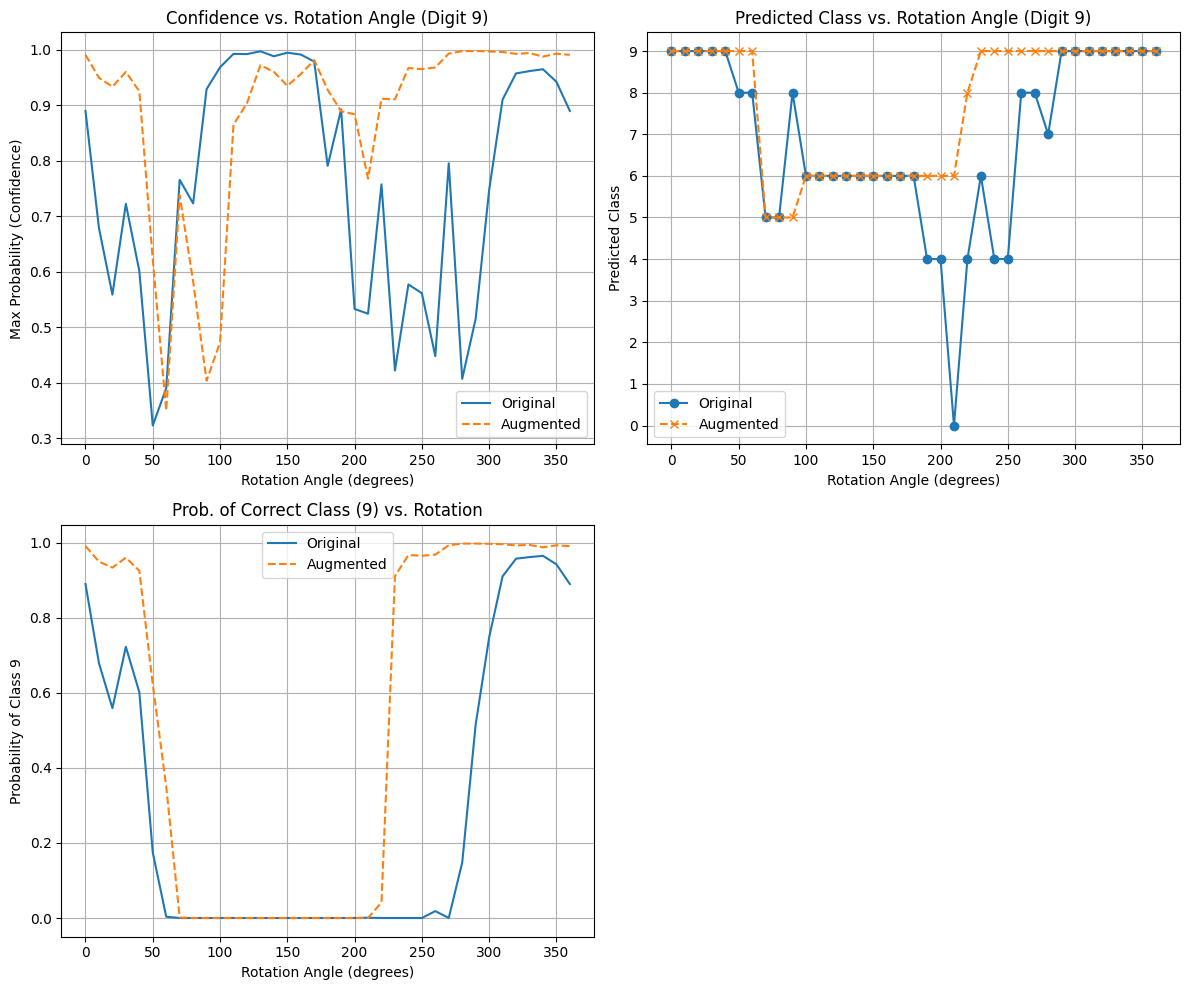

In [72]:
# plot confidence for 9 for both models
digit_to_plot = 9
angles = list(original_model_predictions[digit_to_plot].keys())

confidences_orig = [np.max(original_model_predictions[digit_to_plot][angle]) for angle in angles]
predicted_classes_orig = [np.argmax(original_model_predictions[digit_to_plot][angle]) for angle in angles]

confidences_aug = [np.max(augmented_model_predictions[digit_to_plot][angle]) for angle in angles]
predicted_classes_aug = [np.argmax(augmented_model_predictions[digit_to_plot][angle]) for angle in angles]


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(angles, confidences_orig, label='Original')
plt.plot(angles, confidences_aug, label='Augmented', linestyle='--')
plt.title(f'Confidence vs. Rotation Angle (Digit {digit_to_plot})')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Max Probability (Confidence)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(angles, predicted_classes_orig, marker='o', linestyle='-', label='Original')
plt.plot(angles, predicted_classes_aug, marker='x', linestyle='--', label='Augmented')
plt.title(f'Predicted Class vs. Rotation Angle (Digit {digit_to_plot})')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Predicted Class')
plt.yticks(range(10))
plt.legend()
plt.grid(True)

# plot probability of the correct class
correct_class = digit_to_plot
prob_correct_orig = [original_model_predictions[digit_to_plot][angle][correct_class] for angle in angles]
prob_correct_aug = [augmented_model_predictions[digit_to_plot][angle][correct_class] for angle in angles]

plt.subplot(2, 2, 3)
plt.plot(angles, prob_correct_orig, label='Original')
plt.plot(angles, prob_correct_aug, label='Augmented', linestyle='--')
plt.title(f'Prob. of Correct Class ({correct_class}) vs. Rotation')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel(f'Probability of Class {correct_class}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

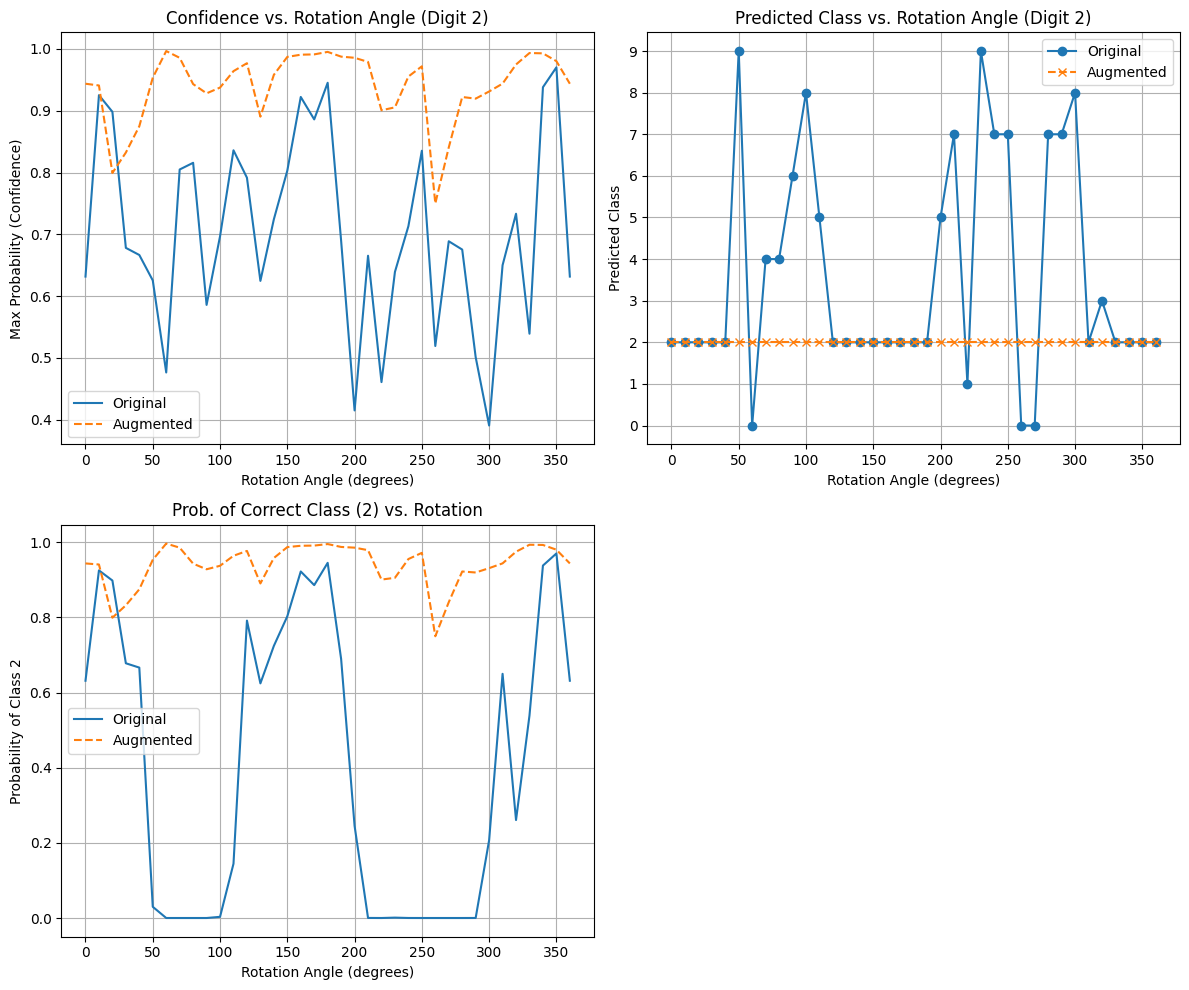

In [73]:
# plot confidence for 2 for both models
digit_to_plot = 2
angles = list(original_model_predictions[digit_to_plot].keys())

confidences_orig = [np.max(original_model_predictions[digit_to_plot][angle]) for angle in angles]
predicted_classes_orig = [np.argmax(original_model_predictions[digit_to_plot][angle]) for angle in angles]

confidences_aug = [np.max(augmented_model_predictions[digit_to_plot][angle]) for angle in angles]
predicted_classes_aug = [np.argmax(augmented_model_predictions[digit_to_plot][angle]) for angle in angles]


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(angles, confidences_orig, label='Original')
plt.plot(angles, confidences_aug, label='Augmented', linestyle='--')
plt.title(f'Confidence vs. Rotation Angle (Digit {digit_to_plot})')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Max Probability (Confidence)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(angles, predicted_classes_orig, marker='o', linestyle='-', label='Original')
plt.plot(angles, predicted_classes_aug, marker='x', linestyle='--', label='Augmented')
plt.title(f'Predicted Class vs. Rotation Angle (Digit {digit_to_plot})')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Predicted Class')
plt.yticks(range(10))
plt.legend()
plt.grid(True)

# plot probability of the correct class
correct_class = digit_to_plot
prob_correct_orig = [original_model_predictions[digit_to_plot][angle][correct_class] for angle in angles]
prob_correct_aug = [augmented_model_predictions[digit_to_plot][angle][correct_class] for angle in angles]

plt.subplot(2, 2, 3)
plt.plot(angles, prob_correct_orig, label='Original')
plt.plot(angles, prob_correct_aug, label='Augmented', linestyle='--')
plt.title(f'Prob. of Correct Class ({correct_class}) vs. Rotation')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel(f'Probability of Class {correct_class}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

- The model is significantly better at classifying digits after undergoing this rotation training
- With 2, for example, the model can accurately predict the 2 at every angle of rotation, whereas before, it would guess each other digit at least once throughout the rotation process. 
- For the 9, it goes between a 6 and a 9 being guessed, with between 70 and 90 degrees it being guessed as a 5, which makes sense if you draw a 5 and rotate your paper 90 degrees, it is roughly 5 shaped.
- The confidence is also affected, with it staying above 80% confident except for an interesting and unexpected dip around 270 degrees for various digits. But overall the confidence remains high whereas it could drop to around 40% before.
- Test accuracy did drop a bit, but that makes sense, since the test images are not rotated, so the more specialized model can perform better with less variation.